# 데이터 전처리
  
  - 머신러닝 모델에 훈련데이터를 주입하기전에 가공하는 단게를 말합니다 

# 비지도학습
   - 타깃 데이터가 없습니다 따라서 무엇을 에측하는 것이 아니라 입력데이터에서 어떤 특징을 찾는데 사용합니다.

# 훈련세트
    -모델을 훈련할때 사용하는 데이터입니다. 보통 훈련세트가 클수록 좋습니다. 따라서 테스트 세트를 제외한 모든데이터를 사 용합니다
  
# 테스트학습
    -전체 데이터에서 20~30%를 테스트 세트로 사용하는경우가 많습니다. 전체데이트가 아주 크다면 1%만 덜어내도 충분히 할 수 있습니다

 # 1. train &test set

In [37]:
]

Text(0, 0.5, 'weigth')

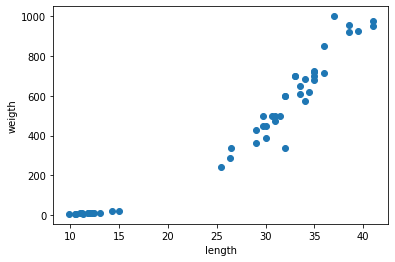

In [50]:
import matplotlib.pyplot as plt
plt.scatter(fish_length,fish_weight)
plt.xlabel("length")
plt.ylabel("weigth")

In [131]:
import numpy as np
fish_data=np.column_stack((fish_length,fish_weight))

In [132]:
fish_target=np.concatenate((np.ones(35),np.zeros(14)))

In [133]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,                 
               31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,                 
               35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,                
               10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 
               500.0,500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 
               620.0, 680.0,700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 
               925.0, 975.0, 950.0, 6.7,7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 
               12.2, 13.4, 12.2, 19.7, 19.9]

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(fish_data, fish_target, random_state=42)

In [135]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

In [136]:
kn.fit(X_train,Y_train)

KNeighborsClassifier()

In [137]:
kn.score(X_train,Y_train)

1.0

In [138]:
kn.predict([[30,600]])

array([1.])

In [139]:
kn.predict([[25,150]])

array([0.])

Text(0, 0.5, 'weigth')

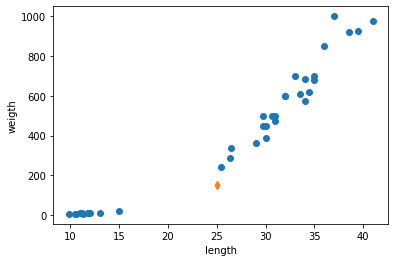

In [140]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0],X_train[:,1])
plt.scatter(25,150,marker="d")
plt.xlabel("length")
plt.ylabel("weigth")

In [141]:
distanes,indexes=kn.kneighbors([[25,150]])

In [142]:
distanes

array([[ 92.00086956, 130.48375378, 138.32150953, 140.00603558,
        140.62090883]])

Text(0, 0.5, 'weigth')

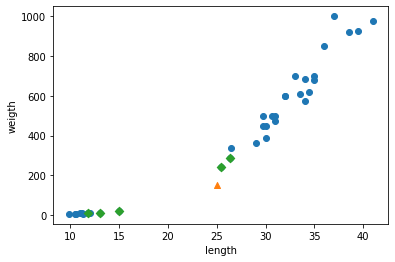

In [143]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0],X_train[:,1])
plt.scatter(25,150,marker="^")
plt.scatter(X_train[indexes,0],X_train[indexes,1],marker="D")
plt.xlabel("length")
plt.ylabel("weigth")

In [144]:
print(X_train[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 13.   12.2]
  [ 26.3 290. ]
  [ 11.8  10. ]]]


In [145]:
X_train[29:30,:]

array([[15. , 19.9]])

# 전처리데이터로 모델훈련하기

In [157]:
#표준편차데이터생성
mean=np.mean(X_train,axis=0)
std=np.std(X_train,axis=0)

In [158]:
print(mean, std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [148]:
train_scaled=(X_train - mean)/std

Text(0, 0.5, 'weigth')

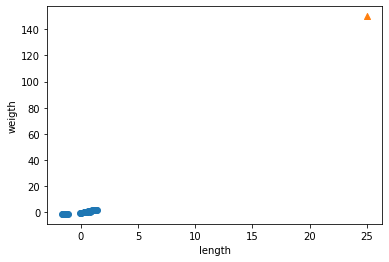

In [159]:
import matplotlib.pyplot as plt
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25, 150, marker="^")
plt.xlabel("length")
plt.ylabel("weigth")

In [160]:
new=([25, 150]- mean)/std

In [161]:
new

array([-0.11507497, -0.83340638])

Text(0, 0.5, 'weigth')

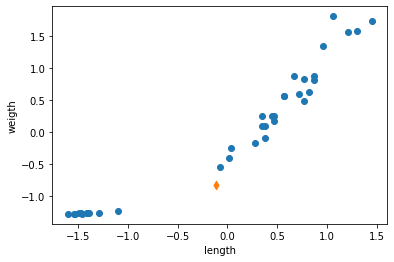

In [173]:
import matplotlib.pyplot as plt
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker="d")
plt.xlabel("length")
plt.ylabel("weigth")

In [174]:
kn.fit(train_scaled,Y_train)

KNeighborsClassifier()

In [175]:
test_scaled=(X_test-mean)/std

In [176]:
kn.score(test_scaled, Y_test)

1.0

In [177]:
print(kn.predict([new]))

[1.]


In [178]:
distanes,indexes=kn.kneighbors([new])

Text(0, 0.5, 'weigth')

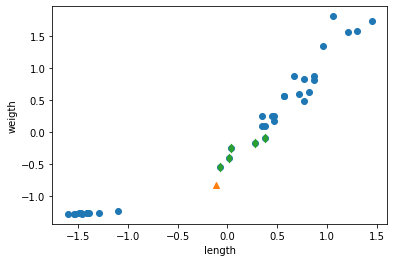

In [179]:
import matplotlib.pyplot as plt
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker="^")
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker="d")
plt.xlabel("length")
plt.ylabel("weigth")